In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('spam.csv', encoding='latin')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## 1. Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [6]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [7]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
df['target'] = le.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
df.duplicated().sum()

403

In [12]:
df = df.drop_duplicates(keep= 'first')

## 2. EDA

In [13]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

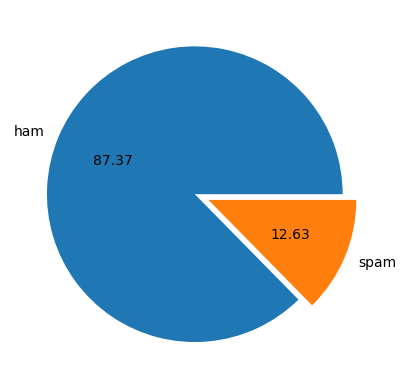

In [14]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f", explode=(0,0.1))
plt.show()

Observation:
    Data is imbalanced

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df['num_char'] = df['text'].apply(len)

In [17]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [18]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [19]:
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
df.describe()

,target,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [21]:
df[df['target']==0].describe()

,target,num_char,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [22]:
df[df['target']==1].describe()

,target,num_char,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_char', ylabel='Count'>

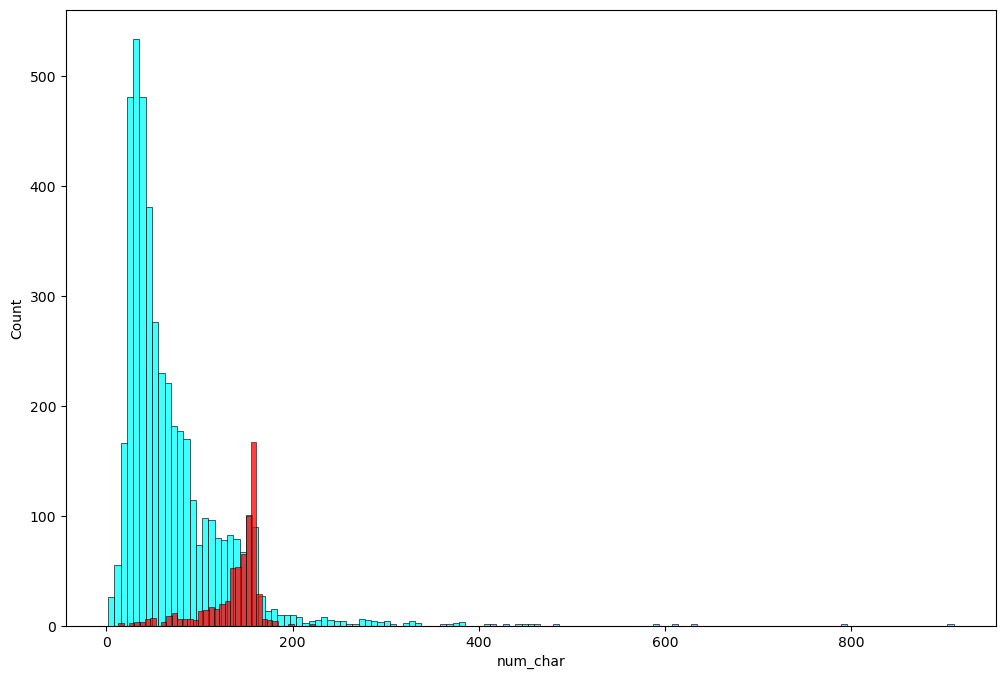

In [23]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_char'],color='cyan')
sns.histplot(df[df['target']==1]['num_char'],color='red')

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

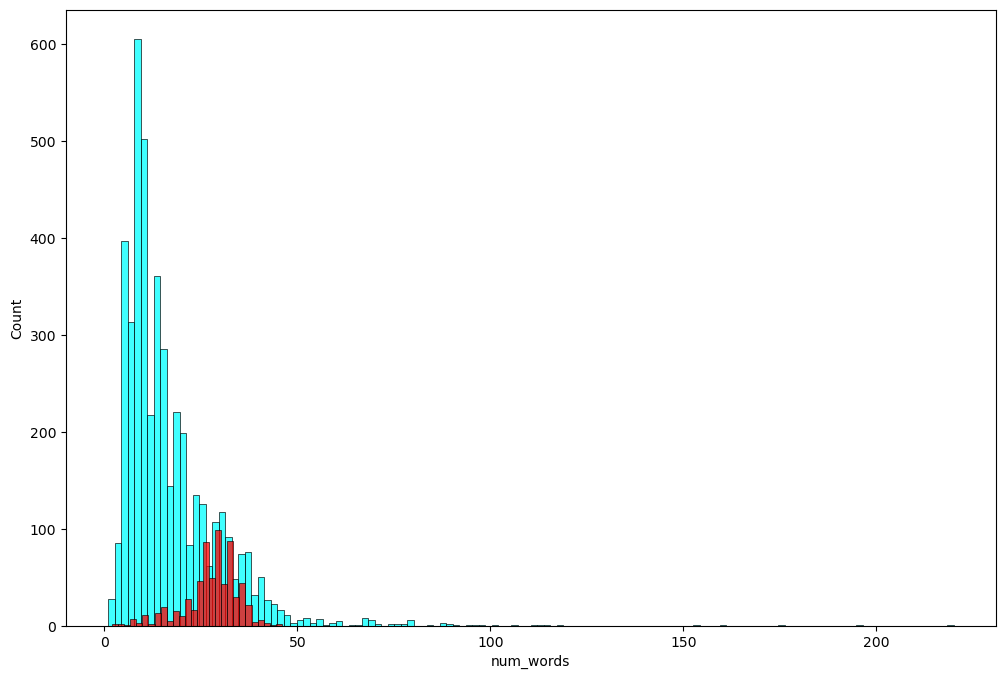

In [24]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'],color='cyan')
sns.histplot(df[df['target']==1]['num_words'],color='red')

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_sentences', ylabel='Count'>

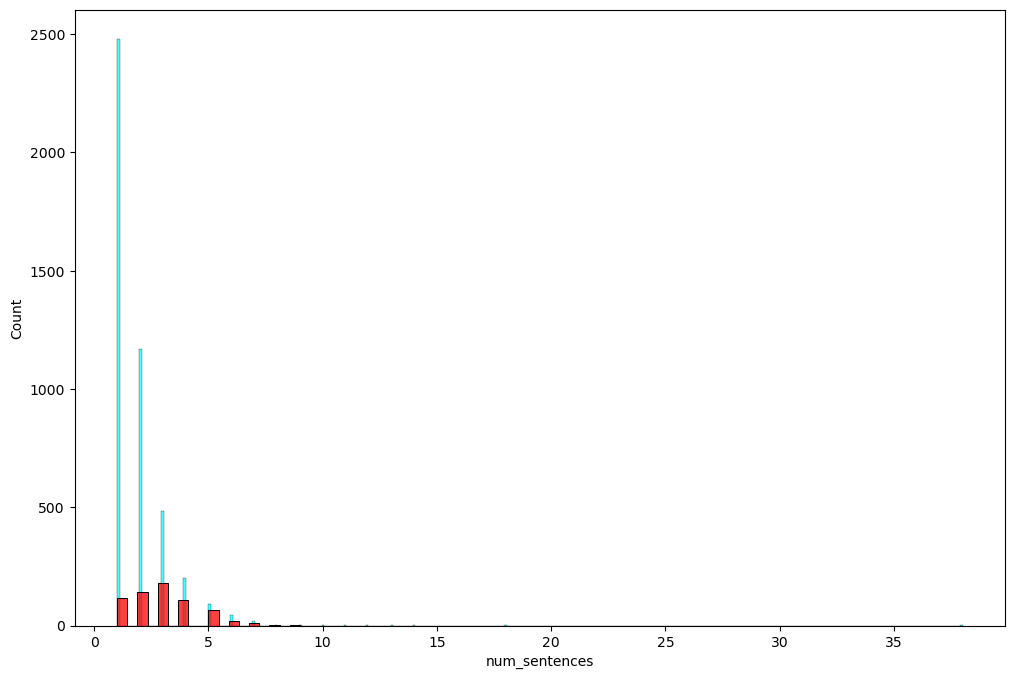

In [25]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_sentences'],color='cyan')
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pan

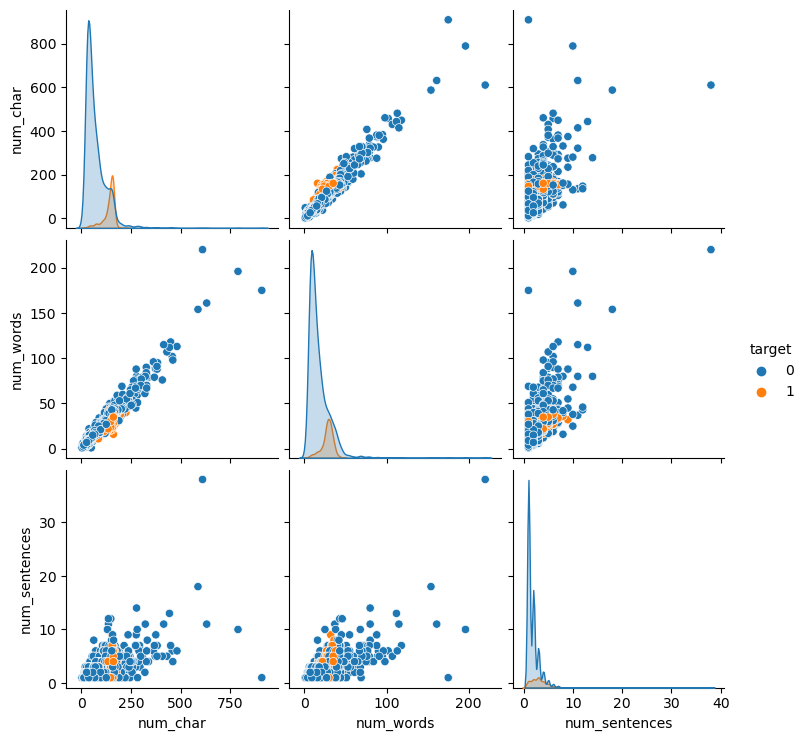

In [26]:
sns.pairplot(df, hue='target')

<Axes: >

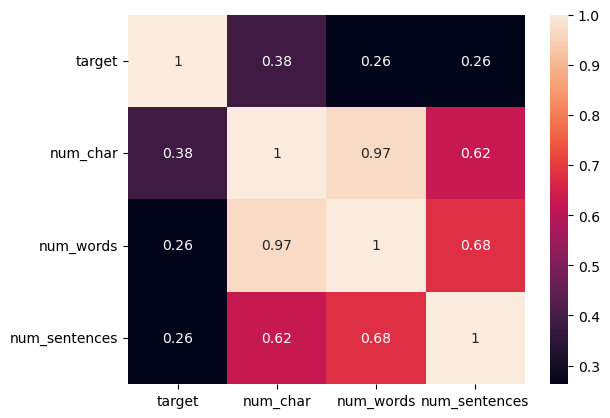

In [27]:
sns.heatmap(df.drop('text', axis=1).corr(), annot=True)

## 3.Data preprocessing
- Lower Case
- tokenization
- Removing special characters
- Removing stop words and punctuations
- Stemming

In [28]:
ps=PorterStemmer()

In [29]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [30]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
df['transformed_text'] = df['text'].apply(transform_text)

In [33]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [34]:
wc = WordCloud(width = 750, height = 750, min_font_size = 10, background_color = 'white')

In [35]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

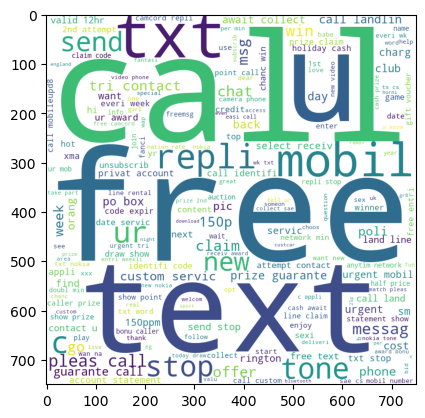

In [36]:
plt.imshow(spam_wc)

In [37]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

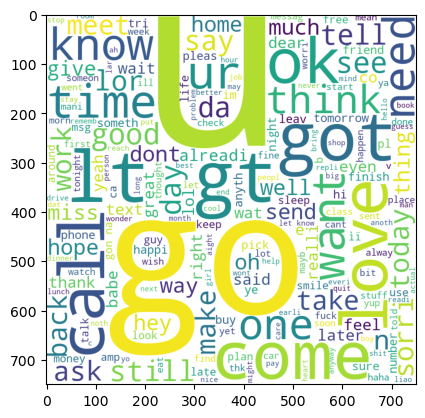

In [38]:
plt.imshow(ham_wc)

In [39]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [40]:
len(spam_corpus)

9939

In [41]:
corpus_df_spam = pd.DataFrame(Counter(spam_corpus).most_common(30))

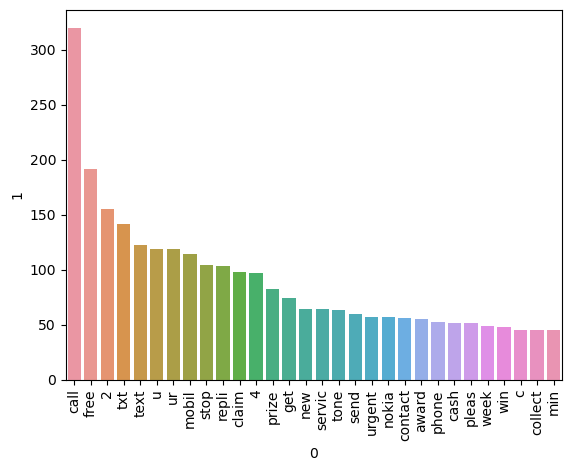

In [42]:
sns.barplot(x=corpus_df_spam[0], y=corpus_df_spam[1])
plt.xticks(rotation='vertical')
plt.show()

In [43]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [44]:
len(ham_corpus)

35404

In [45]:
corpus_df_ham = pd.DataFrame(Counter(ham_corpus).most_common(30))

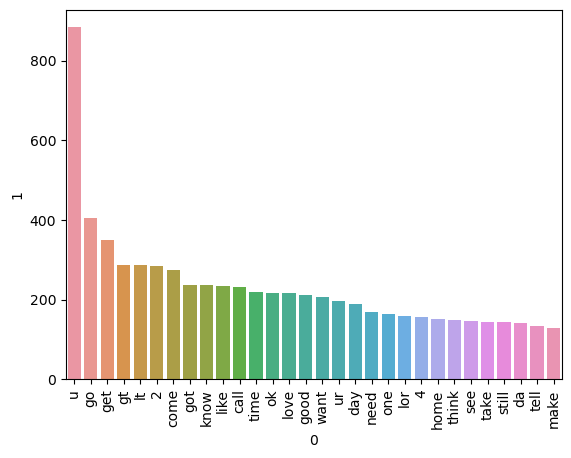

In [46]:
sns.barplot(x=corpus_df_ham[0], y=corpus_df_ham[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [47]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [48]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [172]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [49]:
X.shape

(5169, 3000)

In [50]:
y = df['target'].values

In [51]:
y.shape

(5169,)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [54]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [55]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [180]:
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(precision_score(y_test,y_pred_gnb))

0.8723404255319149
[[782 114]
 [ 18 120]]
0.5128205128205128


In [56]:
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [182]:
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [162]:
!pip install xgboost

In [184]:
svc = SVC(kernel='sigmoid', gamma=0.1)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [185]:
clfs = {'SVC' : svc,
       'KNearest' : knc,
       'MultinomialNaiveBayes' : mnb,
       'LogisticRegression' : lrc,
       'DecisionTree' : dtc,
       'RandomForest' : rfc,
       'AdaBoost' : abc,
       'Bagging' : bc,
       'ExtraTrees' : etc,
       'GradientBoosting' : gbc,
       'XGBoost' : xgb
      }

In [186]:
for i in clfs:
    print(clfs[i])

SVC(gamma=0.1, kernel='sigmoid')
KNeighborsClassifier()
MultinomialNB()
LogisticRegression(penalty='l1', solver='liblinear')
DecisionTreeClassifier(max_depth=5)
RandomForestClassifier(n_estimators=50, random_state=2)
AdaBoostClassifier(random_state=2)
BaggingClassifier(n_estimators=50, random_state=2)
ExtraTreesClassifier(n_estimators=50, random_state=2)
GradientBoostingClassifier(n_estimators=50, random_state=2)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=

In [187]:
def train_classifier(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy, precision

In [188]:
train_classifier(svc, X_train, X_test, y_train, y_test)

(0.9700193423597679, 0.9819819819819819)

In [135]:
accuracy_scores = []
precision_scores = []

for i in clfs:
    acc, prec = train_classifier(clfs[i],X_train, X_test, y_train, y_test)
    print('Model : ',i)
    print('Accuracy : ',acc)
    print('Precision : ',prec)
    accuracy_scores.append(acc)
    precision_scores.append(prec)

Model :  SVC
Accuracy :  0.9110251450676983
Precision :  0.9791666666666666
Model :  KNearest
Accuracy :  0.9003868471953579
Precision :  1.0
Model :  MultinomialNaiveBayes
Accuracy :  0.9593810444874274
Precision :  1.0
Model :  LogisticRegression
Accuracy :  0.9516441005802708
Precision :  0.94
Model :  DecisionTree
Accuracy :  0.9352030947775629
Precision :  0.8380952380952381
Model :  RandomForest
Accuracy :  0.971953578336557
Precision :  1.0
Model :  AdaBoost
Accuracy :  0.9613152804642167
Precision :  0.9454545454545454
Model :  Bagging
Accuracy :  0.9584139264990329
Precision :  0.8625954198473282
Model :  ExtraTrees
Accuracy :  0.9729206963249516
Precision :  0.9824561403508771
Model :  GradientBoosting
Accuracy :  0.9526112185686654
Precision :  0.9238095238095239
Model :  XGBoost
Accuracy :  0.9729206963249516
Precision :  0.9435483870967742


In [136]:
accuracy_scores

[0.9110251450676983,
 0.9003868471953579,
 0.9593810444874274,
 0.9516441005802708,
 0.9352030947775629,
 0.971953578336557,
 0.9613152804642167,
 0.9584139264990329,
 0.9729206963249516,
 0.9526112185686654,
 0.9729206963249516]

In [137]:
precision_scores

[0.9791666666666666,
 1.0,
 1.0,
 0.94,
 0.8380952380952381,
 1.0,
 0.9454545454545454,
 0.8625954198473282,
 0.9824561403508771,
 0.9238095238095239,
 0.9435483870967742]

In [138]:
performance_df = pd.DataFrame({'Models':clfs.keys(), 'Accuracy_score': accuracy_scores, 'Precision_score': precision_scores})

In [139]:
performance_df

,Models,Accuracy_score,Precision_score
0,SVC,0.911025,0.979167
1,KNearest,0.900387,1.000000
2,MultinomialNaiveBayes,0.959381,1.000000
3,LogisticRegression,0.951644,0.940000
4,DecisionTree,0.935203,0.838095
5,RandomForest,0.971954,1.000000
6,AdaBoost,0.961315,0.945455
7,Bagging,0.958414,0.862595
8,ExtraTrees,0.972921,0.982456
9,GradientBoosting,0.952611,0.923810


In [141]:
performance_df.sort_values(by='Precision_score', ascending=False)

,Models,Accuracy_score,Precision_score
1,KNearest,0.900387,1.000000
2,MultinomialNaiveBayes,0.959381,1.000000
5,RandomForest,0.971954,1.000000
8,ExtraTrees,0.972921,0.982456
0,SVC,0.911025,0.979167
6,AdaBoost,0.961315,0.945455
10,XGBoost,0.972921,0.943548
3,LogisticRegression,0.951644,0.940000
9,GradientBoosting,0.952611,0.923810
7,Bagging,0.958414,0.862595


In [144]:
df_melted = pd.melt(performance_df, id_vars='Models')

In [145]:
df_melted

,Models,variable,value
0,SVC,Accuracy_score,0.911025
1,KNearest,Accuracy_score,0.900387
2,MultinomialNaiveBayes,Accuracy_score,0.959381
3,LogisticRegression,Accuracy_score,0.951644
4,DecisionTree,Accuracy_score,0.935203
5,RandomForest,Accuracy_score,0.971954
6,AdaBoost,Accuracy_score,0.961315
7,Bagging,Accuracy_score,0.958414
8,ExtraTrees,Accuracy_score,0.972921
9,GradientBoosting,Accuracy_score,0.952611


D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


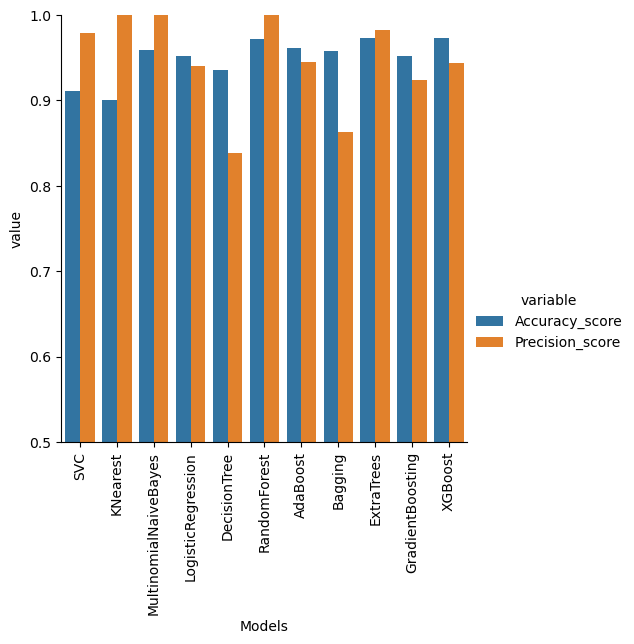

In [147]:
sns.catplot(x='Models', y='value', hue='variable', data=df_melted, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [148]:
# Improving Model Performance
# Changing max_features parameter of TfidfVectorizer

In [168]:
# When Max_features =3000 in Tfidfvectorizer

accuracy_scores_3000 = []
precision_scores_3000 = []

for i in clfs:
    acc, prec = train_classifier(clfs[i],X_train, X_test, y_train, y_test)
    print('Model : ',i)
    print('Accuracy : ',acc)
    print('Precision : ',prec)
    accuracy_scores_3000.append(acc)
    precision_scores_3000.append(prec)

Model :  SVC
Accuracy :  0.9294003868471954
Precision :  0.9710144927536232
Model :  KNearest
Accuracy :  0.9052224371373307
Precision :  1.0
Model :  MultinomialNaiveBayes
Accuracy :  0.9709864603481625
Precision :  1.0
Model :  LogisticRegression
Accuracy :  0.9584139264990329
Precision :  0.9702970297029703
Model :  DecisionTree
Accuracy :  0.9274661508704062
Precision :  0.8118811881188119
Model :  RandomForest
Accuracy :  0.9758220502901354
Precision :  0.9829059829059829
Model :  AdaBoost
Accuracy :  0.960348162475822
Precision :  0.9292035398230089
Model :  Bagging
Accuracy :  0.9584139264990329
Precision :  0.8682170542635659
Model :  ExtraTrees
Accuracy :  0.9748549323017408
Precision :  0.9745762711864406
Model :  GradientBoosting
Accuracy :  0.9468085106382979
Precision :  0.9191919191919192
Model :  XGBoost
Accuracy :  0.9671179883945842
Precision :  0.9262295081967213


In [169]:
performance_df_3000 = pd.DataFrame({'Models':clfs.keys(), 'Accuracy_score_max_ft_3000': accuracy_scores_3000, 'Precision_score_mx_ft_3000': precision_scores_3000})
performance_df_3000

,Models,Accuracy_score_max_ft_3000,Precision_score_mx_ft_3000
0,SVC,0.929400,0.971014
1,KNearest,0.905222,1.000000
2,MultinomialNaiveBayes,0.970986,1.000000
3,LogisticRegression,0.958414,0.970297
4,DecisionTree,0.927466,0.811881
5,RandomForest,0.975822,0.982906
6,AdaBoost,0.960348,0.929204
7,Bagging,0.958414,0.868217
8,ExtraTrees,0.974855,0.974576
9,GradientBoosting,0.946809,0.919192


In [192]:
df_3000_merged = performance_df.merge(performance_df_3000, on='Models')
df_3000_merged

,Models,Accuracy_score,Precision_score,Accuracy_score_max_ft_3000,Precision_score_mx_ft_3000
0,SVC,0.911025,0.979167,0.929400,0.971014
1,KNearest,0.900387,1.000000,0.905222,1.000000
2,MultinomialNaiveBayes,0.959381,1.000000,0.970986,1.000000
3,LogisticRegression,0.951644,0.940000,0.958414,0.970297
4,DecisionTree,0.935203,0.838095,0.927466,0.811881
5,RandomForest,0.971954,1.000000,0.975822,0.982906
6,AdaBoost,0.961315,0.945455,0.960348,0.929204
7,Bagging,0.958414,0.862595,0.958414,0.868217
8,ExtraTrees,0.972921,0.982456,0.974855,0.974576
9,GradientBoosting,0.952611,0.923810,0.946809,0.919192


In [189]:
# After scaling X

accuracy_scores_scaledX = []
precision_scores_scaledX = []

for i in clfs:
    acc, prec = train_classifier(clfs[i],X_train, X_test, y_train, y_test)
    print('Model : ',i)
    print('Accuracy : ',acc)
    print('Precision : ',prec)
    accuracy_scores_scaledX.append(acc)
    precision_scores_scaledX.append(prec)

Model :  SVC
Accuracy :  0.9700193423597679
Precision :  0.9819819819819819
Model :  KNearest
Accuracy :  0.9052224371373307
Precision :  0.9761904761904762
Model :  MultinomialNaiveBayes
Accuracy :  0.9787234042553191
Precision :  0.9461538461538461
Model :  LogisticRegression
Accuracy :  0.9671179883945842
Precision :  0.9642857142857143
Model :  DecisionTree
Accuracy :  0.9313346228239845
Precision :  0.8252427184466019
Model :  RandomForest
Accuracy :  0.9758220502901354
Precision :  0.9829059829059829
Model :  AdaBoost
Accuracy :  0.960348162475822
Precision :  0.9292035398230089
Model :  Bagging
Accuracy :  0.9584139264990329
Precision :  0.8682170542635659
Model :  ExtraTrees
Accuracy :  0.9748549323017408
Precision :  0.9745762711864406
Model :  GradientBoosting
Accuracy :  0.9468085106382979
Precision :  0.9191919191919192
Model :  XGBoost
Accuracy :  0.9671179883945842
Precision :  0.9262295081967213


In [190]:
performance_df_scaledX = pd.DataFrame({'Models':clfs.keys(), 'Accuracy_score_scaledX': accuracy_scores_3000, 'Precision_score_scaledX': precision_scores_3000})
performance_df_scaledX

,Models,Accuracy_score_scaledX,Precision_score_scaledX
0,SVC,0.929400,0.971014
1,KNearest,0.905222,1.000000
2,MultinomialNaiveBayes,0.970986,1.000000
3,LogisticRegression,0.958414,0.970297
4,DecisionTree,0.927466,0.811881
5,RandomForest,0.975822,0.982906
6,AdaBoost,0.960348,0.929204
7,Bagging,0.958414,0.868217
8,ExtraTrees,0.974855,0.974576
9,GradientBoosting,0.946809,0.919192


In [193]:
df_3000_merged.merge(performance_df_scaledX, on='Models')

,Models,Accuracy_score,Precision_score,Accuracy_score_max_ft_3000,Precision_score_mx_ft_3000,Accuracy_score_scaledX,Precision_score_scaledX
0,SVC,0.911025,0.979167,0.929400,0.971014,0.929400,0.971014
1,KNearest,0.900387,1.000000,0.905222,1.000000,0.905222,1.000000
2,MultinomialNaiveBayes,0.959381,1.000000,0.970986,1.000000,0.970986,1.000000
3,LogisticRegression,0.951644,0.940000,0.958414,0.970297,0.958414,0.970297
4,DecisionTree,0.935203,0.838095,0.927466,0.811881,0.927466,0.811881
5,RandomForest,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906
6,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204
7,Bagging,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217
8,ExtraTrees,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576
9,GradientBoosting,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192


In [57]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))